# Goursat's Theorem

In [1]:
using Integrals
using Statistics
using Plots
using LaTeXStrings

include("../curve_plot.jl")

const FIGURES_DIR = "../../figures/"

"../../figures/"

## Line Segments with Arrows

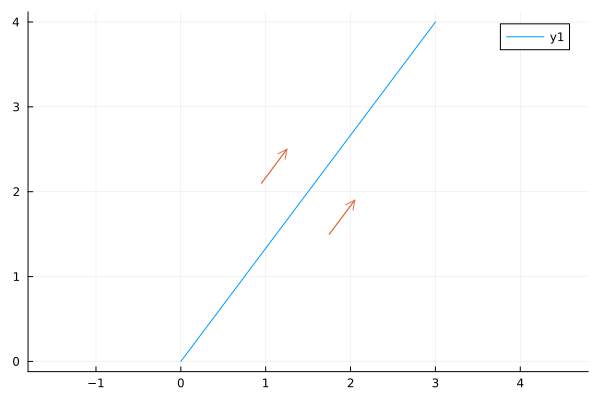

In [2]:
z0 = 0.0 + 0.0im
z1 = 3.0 + 4.0im

plot(
    [real(z0), real(z1)],
    [imag(z0), imag(z1)],
    aspect_ratio=:equal,
)



z_mid = (z0 + z1) / 2

direction_vec = (z1 - z0) / abs(z1 - z0)
normal_vec = (z1 - z0) * 1im / abs(z1 - z0)

arrow_distance = 0.5
arrow_length = 0.5
left_arrow_mid = z_mid + arrow_distance * normal_vec
right_arrow_mid = z_mid - arrow_distance * normal_vec
left_arrow_start = left_arrow_mid - 0.5 * arrow_length * direction_vec
left_arrow_end = left_arrow_mid + 0.5 * arrow_length * direction_vec
right_arrow_start = right_arrow_mid - 0.5 * arrow_length * direction_vec
right_arrow_end = right_arrow_mid + 0.5 * arrow_length * direction_vec

quiver!(
    [real(left_arrow_start), real(right_arrow_start)],
    [imag(left_arrow_start), imag(right_arrow_start)],
    quiver=([real(left_arrow_end - left_arrow_start), real(right_arrow_end - right_arrow_start)],
        [imag(left_arrow_end - left_arrow_start), imag(right_arrow_end - right_arrow_start)]),
    color=palette(:default)[2],
)


In [3]:
"""
Plot a line segment with arrows if required.

# Arguments
- `z0::Complex`: The start point of the line segment.
- `z1::Complex`: The end point of the line segment.
- `arrow_distance::Real=0.5`: The distance from the arrow to the line segment.
- `arrow_length::Real=0.5`: The length of the arrow.
- `color::Symbol=:black`: The color of the line segment.
- `linewidth::Real=1.0`: The width of the line segment.
- `linestyle::Symbol=:solid`: The style of the line segment.
- `which_arrow::Symbol=:both`: Which arrow to plot. It can be `:left`, `:right`, or `:both`.
"""
function plot_line_segment!(
    z0::Complex,
    z1::Complex;
    arrow_distance::Real=0.5,
    arrow_length::Real=0.5,
    color::Symbol=:black,
    linewidth::Real=1.0,
    linestyle::Symbol=:solid,
    which_arrow::Symbol=:both,
)
    # The middle point of the line
    z_mid = (z0 + z1) / 2

    # The direction and normal vectors
    direction_vec = (z1 - z0) / abs(z1 - z0)
    normal_vec = (z1 - z0) * 1im / abs(z1 - z0)

    # Middle points of the arrows
    left_arrow_mid = z_mid + arrow_distance * normal_vec
    right_arrow_mid = z_mid - arrow_distance * normal_vec

    # Start points of the arrows
    left_arrow_start = left_arrow_mid - 0.5 * arrow_length * direction_vec
    left_arrow_end = left_arrow_mid + 0.5 * arrow_length * direction_vec

    # End points of the arrows
    right_arrow_start = right_arrow_mid - 0.5 * arrow_length * direction_vec
    right_arrow_end = right_arrow_mid + 0.5 * arrow_length * direction_vec

    # Plot the line segment
    plot!(
        [real(z0), real(z1)],
        [imag(z0), imag(z1)],
        color=color,
        linewidth=linewidth,
        linestyle=linestyle,
    )

    # Plot the left arrow
    if which_arrow == :left || which_arrow == :both
        quiver!(
            [real(left_arrow_start)],
            [imag(left_arrow_start)],
            quiver=([real(left_arrow_end - left_arrow_start)], [imag(left_arrow_end - left_arrow_start)]),
            color=color,
        )
    end

    # Plot the right arrow
    if which_arrow == :right || which_arrow == :both
        quiver!(
            [real(right_arrow_start)],
            [imag(right_arrow_start)],
            quiver=([real(right_arrow_end - right_arrow_start)], [imag(right_arrow_end - right_arrow_start)]),
            color=color,
        )
    end

    plot!()
end

plot_line_segment!

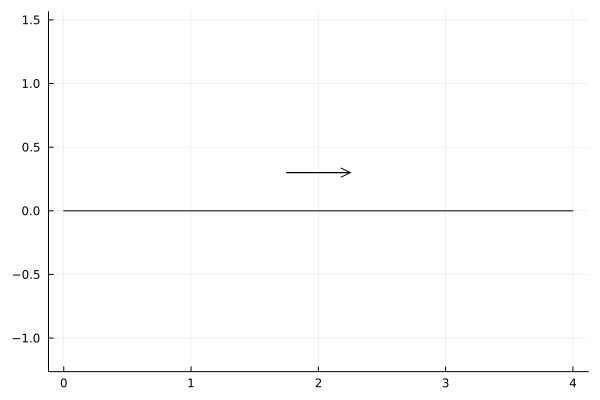

In [18]:

plot(aspect_ratio=:equal, legend=false)
plot_line_segment!(
    z0, z1,
    arrow_distance=0.3,
    arrow_length=0.5,
    linestyle=:solid,
    which_arrow=:left
)

In [5]:
z0 = 0.0 + 0.0im
z1 = 4.0 + 0.0im
z2 = 3.0 + 2im

z3 = z0 + z1
z4 = z1 + z1
z5 = z2 + z1

z6 = z0 + z2
z7 = z1 + z2
z8 = z2 + z2

6.0 + 4.0im

In [6]:
function plot_triangle!(
    z0::Complex,
    z1::Complex,
    z2::Complex;
    arrow_point::Real=0.5,
    color::Union{Symbol,RGB}=:black,
    linestyle::Symbol=:solid,
    arrow_distance::Real=0.5,
    arrow_length::Real=0.5,
)::Plots.Plot
    plot_line_segment!(
        z0,
        z1,
        color=color,
        linestyle=linestyle,
        arrow_distance=arrow_distance,
        arrow_length=arrow_length,
        which_arrow=:left,
    )

    plot_line_segment!(
        z1,
        z2,
        color=color,
        linestyle=linestyle,
        arrow_distance=arrow_distance,
        arrow_length=arrow_length,
        which_arrow=:left,
    )

    plot_line_segment!(
        z2,
        z0,
        color=color,
        linestyle=linestyle,
        arrow_distance=arrow_distance,
        arrow_length=arrow_length,
        which_arrow=:left,
    )
end


plot_triangle! (generic function with 1 method)

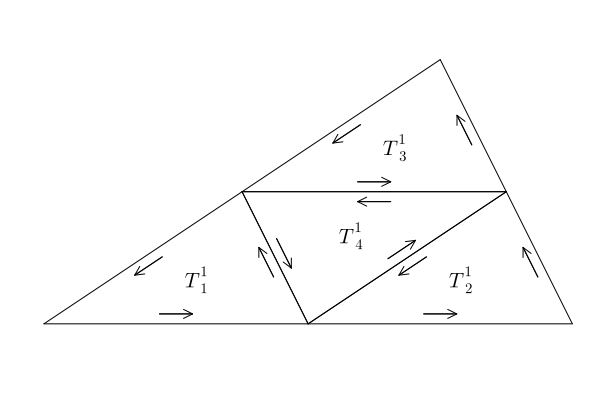

In [15]:
plot(
    aspect_ratio=:equal,
    border=:none,
    legend=nothing,
)

arrow_distance = 0.15

plot_triangle!(
    z0, z1, z2,
    arrow_distance=arrow_distance,
)
annotate!(
    real(mean([z0, z1, z2])),
    imag(mean([z0, z1, z2])),
    text(L"T^1_1"),
)

plot_triangle!(
    z3, z4, z5,
    arrow_distance=arrow_distance,
)
annotate!(
    real(mean([z3, z4, z5])),
    imag(mean([z3, z4, z5])),
    text(L"T^1_2"),
)

plot_triangle!(
    z6, z7, z8,
    arrow_distance=arrow_distance,
)
annotate!(
    real(mean([z6, z7, z8])),
    imag(mean([z6, z7, z8])),
    text(L"T^1_3"),
)

plot_triangle!(
    z6, z1, z5,
    arrow_distance=arrow_distance,
)
annotate!(
    real(mean([z6, z1, z5])),
    imag(mean([z6, z1, z5])),
    text(L"T^1_4"),
)

In [16]:
savefig(joinpath(FIGURES_DIR, "dividing-into-4-triangles.svg"))

"/Users/isaac/Documents/math/complex-analysis/figures/dividing-into-4-triangles.svg"

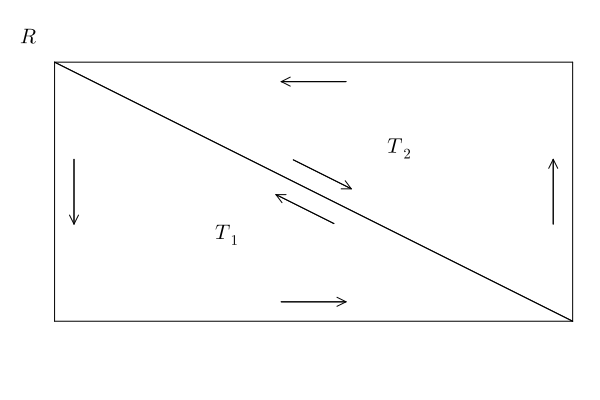

In [39]:
z0 = 0.0 + 0.0im
z1 = 4.0 + 0.0im
z2 = 0.0 + 2im
z3 = 4.0 + 2im

plot(
    aspect_ratio=:equal,
    border=:none,
    legend=nothing,
)

arrow_distance = 0.15

plot_triangle!(
    z0, z1, z2,
    arrow_distance=arrow_distance,
)
annotate!(
    real(mean([z0, z1, z2])),
    imag(mean([z0, z1, z2])),
    text(L"T_1"),
)

plot_triangle!(
    z2, z1, z3,
    arrow_distance=arrow_distance,
)
annotate!(
    real(mean([z2, z1, z3])),
    imag(mean([z2, z1, z3])),
    text(L"T_2"),
)

annotate!(
    real(z2) - 0.2,
    imag(z2) + 0.2,
    text(L"R"),
)

In [40]:
savefig(joinpath(FIGURES_DIR, "dividing-a-rectangle-into-2-triangles.svg"))

"/Users/isaac/Documents/math/complex-analysis/figures/dividing-a-rectangle-into-2-triangles.svg"